In [118]:
import pandas as pd
import numpy as np


In [119]:
amazon_ratings = pd.read_csv('https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/ratings_Beauty.csv')

In [120]:
amazon_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [121]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].mean())
popular_products2 = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating',ascending=False)
most_popular2 = popular_products2.sort_values('Rating',ascending=False)



In [122]:
most_popular.head(10)

,Rating
ProductId,
0205616461,5.0
B00551HYQC,5.0
B0054ZSIXC,5.0
B00550UX52,5.0
B00550YQP0,5.0
B0055189P2,5.0
B00551BAAI,5.0
B00551EJWE,5.0
B00551I2ZY,5.0


In [123]:
merge_outer =pd.merge(most_popular,most_popular2, how='inner', on='ProductId')
merge_outer= merge_outer.sort_values('Rating_y', ascending=False)

In [124]:
result = merge_outer[merge_outer['Rating_y']>=100]
result1 = result[result['Rating_x']>=4.0]
result1

,Rating_x,Rating_y
ProductId,,
B001MA0QY2,4.321386,7533
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
B000ZMBSPE,4.422342,2041
...,...,...
B003BR4LBS,4.380000,100
B005UFN3VS,4.190000,100
B000REOEYM,4.120000,100


In [125]:
result1.columns = ['Mean','Count']
result1

,Mean,Count
ProductId,,
B001MA0QY2,4.321386,7533
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
B000ZMBSPE,4.422342,2041
...,...,...
B003BR4LBS,4.380000,100
B005UFN3VS,4.190000,100
B000REOEYM,4.120000,100


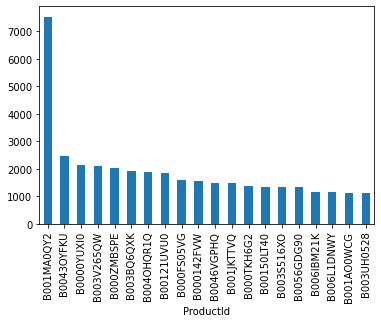

In [126]:
result_Count= result1['Count']
result_Count.head(20).plot(kind="bar")




---



In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

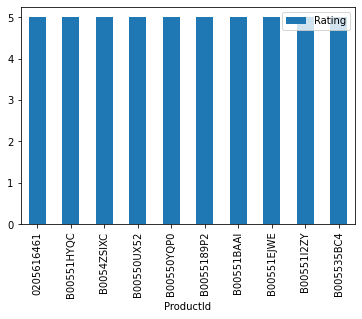

In [128]:
most_popular.head(10).plot(kind = "bar")

In [197]:
# 리뷰 수가 100개 이상되는 상품을 대상으로 평균평점 4.0 이상인 뷰티 상품을 찾아내자

---

### 모델 기반 CF 추천 시스템 만들기

In [132]:
amazon_ratings1 = amazon_ratings.head(10000)

In [133]:
rating_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
rating_utility_matrix.head(10000)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
rating_utility_matrix.shape

(9697, 886)

In [135]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
from surprise import SVD
from surprise import NormalPredictor
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [137]:
!wget "https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/ratings_Beauty.csv"
reader = Reader(line_format = 'user item rating timestamp', sep= ',' , skip_lines=1)
data = Dataset.load_from_file("ratings_Beauty.csv", reader=reader)

--2022-09-19 07:02:13--  https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/ratings_Beauty.csv
Resolving grepp-reco-test.s3.ap-northeast-2.amazonaws.com (grepp-reco-test.s3.ap-northeast-2.amazonaws.com)... 52.219.146.62
Connecting to grepp-reco-test.s3.ap-northeast-2.amazonaws.com (grepp-reco-test.s3.ap-northeast-2.amazonaws.com)|52.219.146.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82432198 (79M) [text/csv]
Saving to: ‘ratings_Beauty.csv.4’

ratings_Beauty.csv. 100%[===================>]  78.61M  29.9MB/s    in 2.6s    

2022-09-19 07:02:16 (29.9 MB/s) - ‘ratings_Beauty.csv.4’ saved [82432198/82432198]



In [138]:
param_grid = {
    'n_epochs' : [20, 30],
    'lr_all' : [0.005, 0.010],
    'n_factors' : [50, 100]
}

gs=GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
gs.fit(data)

KeyboardInterrupt: ignored

In [139]:
trn,tst = train_test_split(data, test_size= 0.3)
svd=SVD()
svd.fit(trn)
pred=svd.test(tst)

In [159]:
ACC=accuracy.rmse(pred)
print("Accuarcy:",ACC)

pred[:10]

RMSE: 1.2505
Accuarcy: 1.2504904997507733


[Prediction(uid='A3RTWAX1FDVSXY', iid='B002LE8P3W', r_ui=5.0, est=4.1686299669652, details={'was_impossible': False}),
 Prediction(uid='A2I1DIUGYJAIWL', iid='B0007W1R58', r_ui=5.0, est=3.9484802285075995, details={'was_impossible': False}),
 Prediction(uid='A31Z9R7Q1FGLKO', iid='B007VH5EBK', r_ui=3.0, est=3.5662569156308916, details={'was_impossible': False}),
 Prediction(uid='A2LHR6T0GD0VCU', iid='B009K2BCYC', r_ui=1.0, est=3.681407505341777, details={'was_impossible': False}),
 Prediction(uid='A10RL09F07391K', iid='B000P251I4', r_ui=1.0, est=4.314975655929387, details={'was_impossible': False}),
 Prediction(uid='A1QFAQD4U75JK3', iid='B000V2MBZ4', r_ui=4.0, est=4.45941537228506, details={'was_impossible': False}),
 Prediction(uid='A36C17926WKSEL', iid='B00178TVXG', r_ui=5.0, est=3.7445708284627077, details={'was_impossible': False}),
 Prediction(uid='A38FAEVHBM7LL1', iid='B00C7WPEMI', r_ui=5.0, est=4.473249939035199, details={'was_impossible': False}),
 Prediction(uid='A1CPDIFEQFVDUQ'

In [157]:
tst[:10]

[('A3RTWAX1FDVSXY', 'B002LE8P3W', 5.0),
 ('A2I1DIUGYJAIWL', 'B0007W1R58', 5.0),
 ('A31Z9R7Q1FGLKO', 'B007VH5EBK', 3.0),
 ('A2LHR6T0GD0VCU', 'B009K2BCYC', 1.0),
 ('A10RL09F07391K', 'B000P251I4', 1.0),
 ('A1QFAQD4U75JK3', 'B000V2MBZ4', 4.0),
 ('A36C17926WKSEL', 'B00178TVXG', 5.0),
 ('A38FAEVHBM7LL1', 'B00C7WPEMI', 5.0),
 ('A1CPDIFEQFVDUQ', 'B0076OMKG0', 5.0),
 ('A3LHBF3C08687E', 'B006H6MP0Y', 5.0)]

In [112]:
pred=svd.predict('A14QOO2H6RBTJC', 'B000A3V2PE',verbose=True)

user: A14QOO2H6RBTJC item: B000A3V2PE r_ui = None   est = 4.44   {'was_impossible': False}


In [161]:
a=pd.DataFrame(pred)
a

,uid,iid,r_ui,est,details
0,A3RTWAX1FDVSXY,B002LE8P3W,5.0,4.168630,{'was_impossible': False}
1,A2I1DIUGYJAIWL,B0007W1R58,5.0,3.948480,{'was_impossible': False}
2,A31Z9R7Q1FGLKO,B007VH5EBK,3.0,3.566257,{'was_impossible': False}
3,A2LHR6T0GD0VCU,B009K2BCYC,1.0,3.681408,{'was_impossible': False}
4,A10RL09F07391K,B000P251I4,1.0,4.314976,{'was_impossible': False}
...,...,...,...,...,...
606916,A37B4BE0XZ8UU2,B0000AFUTL,5.0,4.544151,{'was_impossible': False}
606917,A18D32PCGORQVE,B008L0O4EO,2.0,3.770958,{'was_impossible': False}
606918,AYRCHQDZN8UYO,B002D48R1A,4.0,4.141513,{'was_impossible': False}
606919,AQEG18ZTJ6C6X,B0000536P4,3.0,3.744940,{'was_impossible': False}


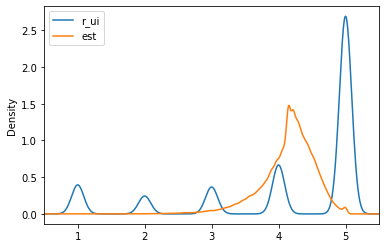

In [196]:
import seaborn as sns

a.plot(kind = "kde")
plt.xlim([0.5,5.5])
plt.show()